In [11]:
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium import webdriver
import time
import pandas as pd
import sys
import subprocess 

In [121]:
import seaborn as sns

In [19]:
import pandas as pd

df = pd.read_csv("glassdoor_jobs.csv")

df = df[df['Salary Estimate'] != '-1']

salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])

k_removed = salary.apply(lambda x: x.replace('K','').replace('$',''))

df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)

df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary' in x.lower() else 0)

min_hour = k_removed.apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary',''))

In [26]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0


In [22]:
min_salary = (min_hour.apply(lambda x: (x.split('-')[0]))).str.replace(r'\D+', '')
max_salary = (min_hour.apply(lambda x: (x.split('-')[1]))).str.replace(r'\D+', '')

In [25]:
df.drop(['max_salary'],axis=1,inplace = True)

In [27]:
df['min_salary'],df['max_salary'] = min_salary,max_salary

In [28]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143


In [29]:
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
employer_provided      int64
min_salary            object
max_salary            object
dtype: object

In [30]:
df = df.astype({"min_salary": int})

In [31]:
# convert just columns "a" and "b"
df["max_salary"] = df["max_salary"].apply(pd.to_numeric)

In [32]:
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
employer_provided      int64
min_salary             int32
max_salary             int64
dtype: object

In [33]:
df['company_name'] = df.apply(lambda x: x['Company Name'] if x['Rating'] < 0 else x['Company Name'][:-3] , axis=1)

In [34]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,company_name
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,Tecolote Research\n
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,University of Maryland Medical System\n
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,KnowBe4\n
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,PNNL\n
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,Affinity Solutions\n


In [41]:
df['job_state'] = df['Location'].apply(lambda x: x.split(',')[1])

In [44]:
df['same_state'] = df.apply(lambda x: 1 if x.Location == x.Headquarters else 0 ,axis =1)

In [45]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,company_name,job_state,same_state
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,Tecolote Research\n,NM,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,University of Maryland Medical System\n,MD,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,Business Services,$100 to $500 million (USD),-1,0,0,80,90,KnowBe4\n,FL,1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,PNNL\n,WA,1
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,Affinity Solutions\n,NY,1


In [46]:
df['age'] = df['Founded'].apply(lambda x: x if x < 1 else 2021 - x)

In [50]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Competitors,hourly,employer_provided,min_salary,max_salary,company_name,job_state,same_state,age,python
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,-1,0,0,53,91,Tecolote Research\n,NM,0,48,1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,-1,0,0,63,112,University of Maryland Medical System\n,MD,0,37,1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,-1,0,0,80,90,KnowBe4\n,FL,1,11,1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,PNNL\n,WA,1,56,1
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,Affinity Solutions\n,NY,1,23,1


In [48]:
df['Job Description'][0]

'Data Scientist\nLocation: Albuquerque, NM\nEducation Required: Bachelor’s degree required, preferably in math, engineering, business, or the sciences.\nSkills Required:\nBachelor’s Degree in relevant field, e.g., math, data analysis, database, computer science, Artificial Intelligence (AI); three years’ experience credit for Master’s degree; five years’ experience credit for a Ph.D\nApplicant should be proficient in the use of Power BI, Tableau, Python, MATLAB, Microsoft Word, PowerPoint, Excel, and working knowledge of MS Access, LMS, SAS, data visualization tools, and have a strong algorithmic aptitude\nExcellent verbal and written communication skills, and quantitative analytical skills are required\nApplicant must be able to work in a team environment\nU.S. citizenship and ability to obtain a DoD Secret Clearance required\nResponsibilities: The applicant will be responsible for formulating analytical solutions to complex data problems; creating data analytic models to improve data

In [49]:
df["python"] = df['Job Description'].apply(lambda x : 1 if 'python' in x.lower() else 0) 

In [51]:
df.python.value_counts()

1    392
0    350
Name: python, dtype: int64

In [52]:
df["math"] = df['Job Description'].apply(lambda x : 1 if 'math' in x.lower() else 0) 
df["data_analysis"] = df['Job Description'].apply(lambda x : 1 if 'data analysis' in x.lower() else 0) 
df["database"] = df['Job Description'].apply(lambda x : 1 if 'database' in x.lower() else 0) 
df["Power_BI"] = df['Job Description'].apply(lambda x : 1 if 'Power BI' in x.lower() else 0)
df["tableau"] = df['Job Description'].apply(lambda x : 1 if 'Tableau' in x.lower() else 0)
df["MATLAB"] = df['Job Description'].apply(lambda x : 1 if 'MATLAB' in x.lower() else 0)
df["word"] = df['Job Description'].apply(lambda x : 1 if 'Word' in x.lower() else 0)
df["excel"] = df['Job Description'].apply(lambda x : 1 if 'excel' in x.lower() else 0)
df["spark"] = df['Job Description'].apply(lambda x : 1 if 'spark' in x.lower() else 0)
df["r_studio"] = df['Job Description'].apply(lambda x : 1 if 'r studio' or 'r-studio' in x.lower() else 0)
df["aws"] = df['Job Description'].apply(lambda x : 1 if 'aws' in x.lower() else 0)
df["azure"] = df['Job Description'].apply(lambda x : 1 if 'azure' in x.lower() else 0)

In [61]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,database,Power_BI,tableau,MATLAB,word,excel,spark,r_studio,aws,azure
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,1,0,0,0,0,1,0,1,0,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,0,0,0,0,0,0,0,1,0,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,0,0,0,0,0,1,1,1,0,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,0,0,0,0,0,0,0,1,0,0
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,1,0,0,0,0,1,0,1,0,0


In [54]:
df.aws.value_counts()

0    566
1    176
Name: aws, dtype: int64

In [55]:
df.azure.value_counts()

0    688
1     54
Name: azure, dtype: int64

In [56]:
df.MATLAB.value_counts()

0    742
Name: MATLAB, dtype: int64

In [57]:
df.Power_BI.value_counts()

0    742
Name: Power_BI, dtype: int64

In [58]:
df.database.value_counts()

0    493
1    249
Name: database, dtype: int64

In [59]:
df.data_analysis.value_counts()

0    541
1    201
Name: data_analysis, dtype: int64

In [64]:
df.r_studio.value_counts()

0    741
1      1
Name: r_studio, dtype: int64

In [65]:
df["r_studio"] = df['Job Description'].apply(lambda x : 1 if 'r studio'  or 'r-studio' in x.lower() else 0)

In [66]:
df.r_studio.value_counts()

1    742
Name: r_studio, dtype: int64

In [67]:
df.spark.value_counts()

0    575
1    167
Name: spark, dtype: int64

In [68]:
df.excel.value_counts()

1    388
0    354
Name: excel, dtype: int64

In [69]:
df.drop(['Unnamed: 0'],axis=1,inplace = True)

In [70]:
df.to_csv("glassdoor_salary_clean.csv",index = False)

### Exploratory Data Analysis

In [81]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'research scientist' in title.lower():
        return 'research scientist'
    elif 'big data' in title.lower():
        return 'big data engineer'
    elif 'data architect' in title.lower():
        return 'data architect'
    elif 'data modeler' in title.lower():
        return 'data modeler'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or "senior" in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr' in title.lower():
        return 'jr'
    else:
        return 'na'

In [82]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'company_name', 'job_state', 'same_state', 'age', 'python', 'math',
       'data_analysis', 'database', 'Power_BI', 'tableau', 'MATLAB', 'word',
       'excel', 'spark', 'r_studio', 'aws', 'azure', 'title_simp'],
      dtype='object')

In [83]:
df['Job Title'].value_counts()[:20]

Data Scientist                                    131
Data Engineer                                      53
Senior Data Scientist                              34
Data Analyst                                       15
Senior Data Engineer                               14
Senior Data Analyst                                12
Lead Data Scientist                                 8
Marketing Data Analyst                              6
Sr. Data Engineer                                   6
Machine Learning Engineer                           5
Principal Data Scientist                            5
Sr. Data Engineer - Contract-to-Hire (Java)         4
Staff Scientist-Downstream Process Development      4
Food Scientist - Developer                          4
MED TECH/LAB SCIENTIST- SOUTH COASTAL LAB           4
Analytics Manager - Data Mart                       4
Senior Research Scientist-Machine Learning          4
R&D Specialist/ Food Scientist                      4
Research Scientist          

In [84]:
df['title_simp'] = df['Job Title'].apply(title_simplifier)

In [85]:
df['title_simp'].value_counts()

data scientist        279
na                    164
data engineer         119
data analyst           99
machine learning       22
manager                22
research scientist     15
director               14
data modeler            4
analyst                 3
data architect          1
Name: title_simp, dtype: int64

In [86]:
df['seniority'] = df['Job Title'].apply(seniority)

In [87]:
df['seniority'].value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [88]:
df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 NC              21
 WA              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 UT              10
 IN              10
 MO               9
 AZ               9
 AL               8
 DE               6
 MI               6
 GA               6
 KY               6
 CT               5
 IA               5
 LA               4
 NE               4
 OR               4
 KS               3
 NM               3
 MN               2
 ID               2
 RI               1
 Los Angeles      1
 SC               1
Name: job_state, dtype: int64

In [92]:
df['job_state'] = df['job_state'].apply(lambda x : x.strip() if x.strip().lower() != 'los angeles' else "CA")

In [93]:
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
IN     10
WI     10
UT     10
AZ      9
MO      9
AL      8
GA      6
DE      6
MI      6
KY      6
IA      5
CT      5
NE      4
LA      4
OR      4
KS      3
NM      3
MN      2
ID      2
RI      1
SC      1
Name: job_state, dtype: int64

In [94]:
df['comp_count'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [95]:
df['job_desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [96]:
df.Competitors

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
950                           Pfizer, AstraZeneca, Merck
951                      See Tickets, TicketWeb, Vendini
952                                                   -1
953                                                   -1
955                                                   -1
Name: Competitors, Length: 742, dtype: object

In [97]:
df.comp_count

0      0
1      0
2      0
3      3
4      3
      ..
950    3
951    3
952    0
953    0
955    0
Name: comp_count, Length: 742, dtype: int64

In [98]:
df.job_desc_len

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
950    6162
951    6130
952    3078
953    1642
955    3673
Name: job_desc_len, Length: 742, dtype: int64

In [103]:
df1 = df.reset_index()

In [105]:
df = df1

In [106]:
df[df.hourly == 1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,17,24
177,1,21,34
197,1,18,25
202,1,21,34
210,1,15,25
246,1,17,24
271,1,21,34
337,1,18,25
345,1,24,39
357,1,21,34


In [107]:
df['company_name'] = df.company_name.apply(lambda x: x.replace('\n',''))

In [108]:
df.company_name

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_name, Length: 742, dtype: object

In [110]:
df['avg_salary'] = (df['max_salary'] + df['min_salary'])/2 

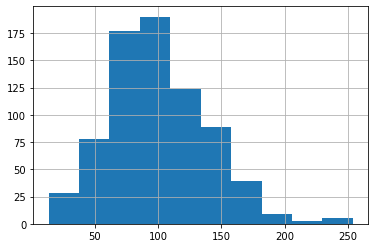

In [112]:
df.avg_salary.hist();

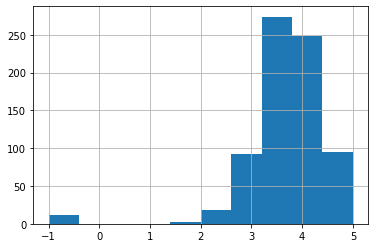

In [113]:
df.Rating.hist();

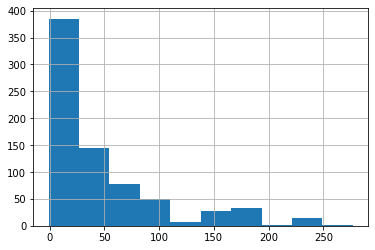

In [114]:
df.age.hist();

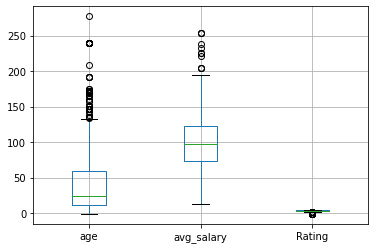

In [117]:
df.boxplot(column= ['age','avg_salary','Rating']);

In [120]:
df[['age','avg_salary','Rating','job_desc_len']].corr()

,age,avg_salary,Rating,job_desc_len
age,1.000000,0.019574,0.023162,0.164188
avg_salary,0.019574,1.000000,0.013492,0.078808
Rating,0.023162,0.013492,1.000000,-0.012281
job_desc_len,0.164188,0.078808,-0.012281,1.000000


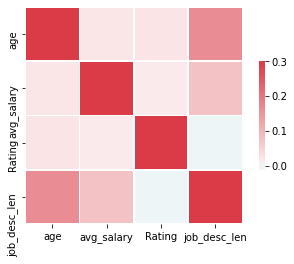

In [122]:
corr = df[['age','avg_salary','Rating','job_desc_len']].corr()
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,vmax=0.3,center=0,cmap=cmap,square=True,linewidths=0.5,cbar_kws={'shrink': 0.5})